In [1]:
#from boson_data_lib import *
import numpy as np
#import scipy.linalg as sl
import os
import pandas as pd
import h5py

In [3]:
#parent_dir = "home/zah/POP23/"
#models_dir = parent_dir + "MODELS/"

In [4]:
#models_file = "MODELS/POP_RmLME_trn4_gap_fix-Phi-up_2023-Aug-07_at_19-32.h5"
models_file = "MODELS/POP_NoRmLME_trn4_gap_fix-Phi-up_2023-Aug-07_at_16-29.h5"

In [5]:
with h5py.File(models_file, "r") as f:
    print(f["gamma_0.079477"].keys())

<KeysViewHDF5 ['A_lme', 'A_sid_exact', 'A_sid_lme', 'H_lme', 'H_sid_exact', 'H_sid_lme', 'coef_gap_ex', 'coef_gap_lme', 'coef_max_ex', 'coef_max_lme', 'coef_min_ex', 'coef_min_lme', 'obj_val_lme', 'obj_val_lme_on_exact', 'obj_val_sid_on_exact', 'obj_val_sid_on_lme']>


In [6]:
def get_op(gamma, op_name):
    with h5py.File(models_file, "r") as f:
        return(f["gamma_"+gamma][op_name][()])

In [7]:
ndA = []
ndH = []
gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']
for gamma in gammas:
    dA = get_op(gamma,  'A_sid_lme') -  get_op(gamma,  'A_lme') 
    ndA.append(np.abs(np.trace(dA@dA.T)))
    dH = get_op(gamma,  'H_sid_lme') -  get_op(gamma,  'H_lme')
    ndH.append(np.abs(np.trace(dH@dH.T)))
print(max(ndA[1:]))
print(max(ndH[1:]))

1.3195023639566677e-11
1.1687748389106305e-08


In [8]:
coef_gap_ex = []
coef_gap_lme = []
g = []
gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']

with h5py.File(models_file, "r") as f:

    
    #gammas = f.keys()
    
    for gamma in gammas:

        print(gamma)

        coef_gap_ex.append(f["gamma_"+gamma]["coef_gap_ex"][()])
        coef_gap_lme.append(f["gamma_"+gamma]["coef_gap_lme"][()])

print(" done!")

0.079477
0.25133
0.79477
2.5133
7.9477
25.133
79.477
251.33
 done!


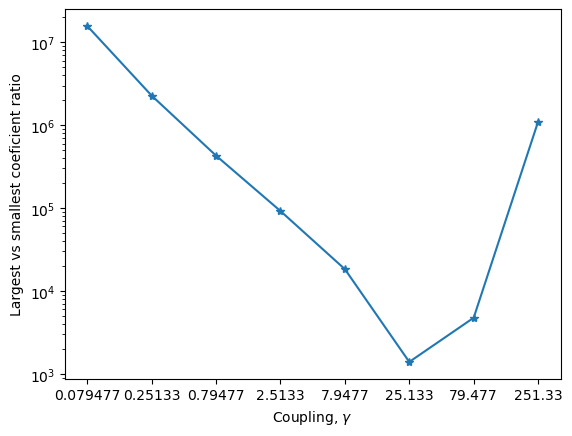

In [9]:
import matplotlib.pyplot as plt
plt.plot(coef_gap_ex, "-*")
plt.yscale("log")
plt.xticks(ticks=range(len(coef_gap_lme)), labels = gammas)
#plt.title("Largest vs smallest coefficient ratio")
plt.xlabel(r"Coupling, $\gamma$")
plt.ylabel("Largest vs smallest coeficient ratio")
plt.savefig("Coefs_ratio_NoRm_SpinBoson.pdf")
#plt.show()

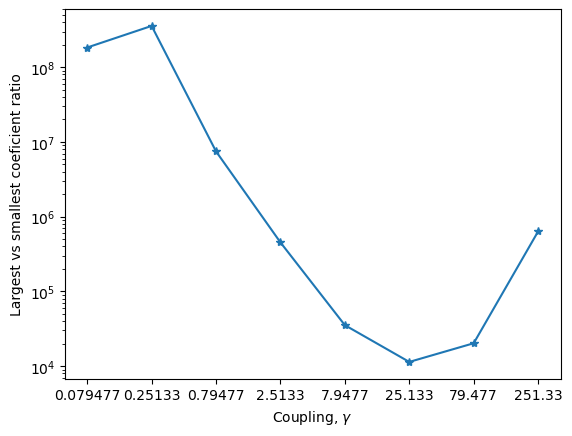

In [47]:
import matplotlib.pyplot as plt
plt.plot(coef_gap_lme, "-*")
plt.yscale("log")
plt.xticks(ticks=range(len(coef_gap_lme)), labels = gammas)
#plt.title("Largest vs smallest coefficient ratio")
plt.xlabel(r"Coupling, $\gamma$")
plt.ylabel("Largest vs smallest coeficient ratio")
plt.savefig("Coefs_ratio_NoRm_simLME.pdf")
#plt.show()

In [43]:
g = []        
obj_val_lme = []
obj_val_sid_on_lme = []
gammas = ['0.079477', '0.25133', '0.79477', '2.5133', '7.9477', '25.133', '79.477', '251.33']
    

with h5py.File(models_file, "r") as f:

    
    #gammas = f.keys()

    for gamma in gammas:

        print(gamma)
        
        #g.append(gamma[6:])

        obj_val_lme.append(f["gamma_"+gamma]["obj_val_lme"][()])
        obj_val_sid_on_lme.append(f["gamma_"+gamma]["obj_val_sid_on_lme"][()])

print(" done!")

0.079477
0.25133
0.79477
2.5133
7.9477
25.133
79.477
251.33
 done!


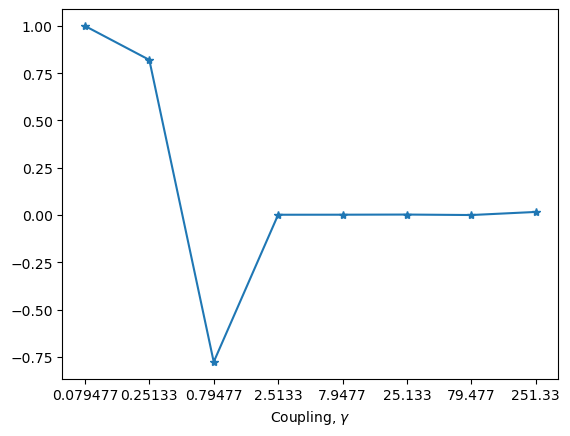

In [49]:
overfit = (np.array(obj_val_lme) - np.array(obj_val_sid_on_lme))/np.array(obj_val_lme)

plt.plot(overfit, "-*")
#plt.yscale("log")
plt.xticks(ticks=range(len(obj_val_lme)), labels = gammas)
#plt.title("Overfitting ratio")
plt.xlabel(r"Coupling, $\gamma$")
plt.show()
#plt.savefig("Overfit_ratio_simLME.pdf")

0.079477
0.25133
0.79477
2.5133
7.9477
25.133
79.477
251.33
 done!


In [7]:
g

[]

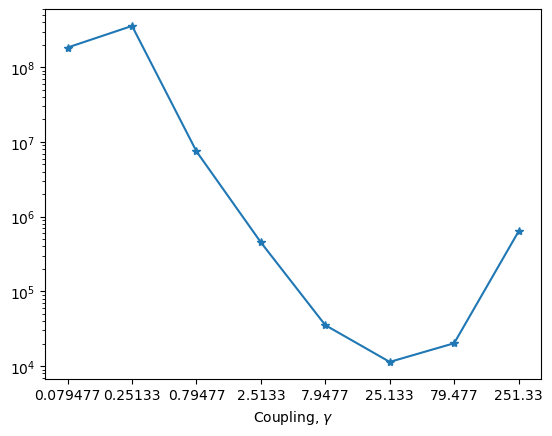

In [8]:
import matplotlib.pyplot as plt
plt.plot(coef_gap_lme, "-*")
plt.yscale("log")
plt.xticks(ticks=range(len(coef_gap_lme)), labels = gammas)
#plt.title("Largest vs smallest coefficient ratio")
plt.xlabel(r"Coupling, $\gamma$")
plt.savefig("Coefs_ratio_rm_simLME.pdf")
#plt.show()

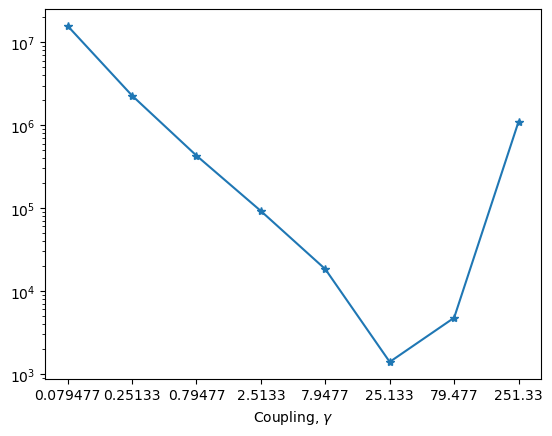

In [8]:
import matplotlib.pyplot as plt
plt.plot(coef_gap_ex, "-*")
plt.yscale("log")
plt.xticks(ticks=range(len(coef_gap_ex)), labels = gammas)
#plt.title("Largest vs smallest coefficient ratio")
plt.xlabel(r"Coupling, $\gamma$")
#plt.show()
plt.savefig("Coefs_ratio_exact.pdf")

In [12]:
 overfit_ratio = [ 2 *(obj_val_sid_on_lme[i] - objdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAigAAAG0CAYAAAAYQdwgAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAA9hAAAPYQGoP6dpAABevElEQVR4nO3deVxU5f4H8M+ZGYadUWSRTdwXREERF0zLFgyXNCu9ZqapubaYt/xldW9ds2xVu4Xmblmm5nat3OimoqKiCIoi4gICLiAouwzMzPP7Q+GKgIICZ5bP+/Wa10vOnDnnM3MOzpfznOd5JCGEABEREZERUcgdgIiIiOhuLFCIiIjI6LBAISIiIqPDAoWIiIiMDgsUIiIiMjosUIiIiMjosEAhIiIio6OSO0BtGQwGXL58GY6OjpAkSe44REREVANCCOTn58PT0xMKxf2vj5hcgXL58mX4+PjIHYOIiIgeQFpaGry9ve+7nskVKI6OjgBuvUEnJyeZ0xAREVFN5OXlwcfHp/x7/H5MrkApa9ZxcnJigUJERGRianp7Bm+SJSIiIqPDAoWIiIiMDgsUIiIiMjosUIiIiMjosEAhIiIio2MyBUp4eDj8/PwQHBwsdxQiIiKqZ5IQQsgdojby8vKg0WiQm5vLbsZEREQmorbf3yZzBYWIiIgsBwsUIiIiMjosUIiIiMjosEC5w4n0HIxccggn0nPkjkJERGTRWKDcYdOxSzh4IRubjl2SOwoREZFFM7nJAuta+o0i3CgshSQBG4+lAwB+O34Zzwd5Qwigsb0VvBvbyZySiIjIslh8gfLI57srLcsuLMGgb/eX/5zy2cCGjERERGTxLL6JZ8GIQKgUVU/9rFJIWDAisGEDEREREa+gDO3ihdZuDhWumJTZMq03/L00MqQiIiKybBZ/BeVO0l0XUjbHpssThIiIyMKxQAHQxEENVwdrdPLS4JNn/dHUyRoAsHx/CtYfTZM5HRERkeXhXDy3aXV6qJUKSJIEg8GAT7YlYvn+ZCgkYNFLQejfsWmd7YuIiMjScC6eB2StUkK63cajUCjwwcAOGN7NGwYBvP5LLKLOZ8mckIiIyHKwQKmGJEn49NlOCPVzR4nOgIk/xiA+PVfuWERERBaBBco9qJQK/HtkF4S0aoICrQ5jVkbjXGaB3LGIiIjMHguU+7CxUmLJy93Q2VuD64UleHn5YVzKuSl3LCIiIrPGAqUGHKxVWPVKd7Rytcfl3GKMXn4Y2QVauWMRERGZLRYoNeRsr8bq8T3gqbHBhWuFeGXVERRodXLHIiIiMksNXqCcOXMGgYGB5Q9bW1ts2bKloWM8EM9Gtlg9oQec7dU4kZ6LV384iuJSvdyxiIiIzI6s46AUFBSgefPmuHjxIuzt7Wv0mvoaB6U24tNzMXLpIRRodQj1c8fCUV2hUvJiFBERUXVMahyUrVu34oknnqhxcWIsOnlrsPTlblCrFNiVkIFZm+JhYuPdERERGbVaFyiRkZEYPHgwPD09IUlSlc0zCxcuRIsWLWBjY4OgoCDs27evym2tX78eI0aMqHVoY9CrVRN8N7ILFBLwa0w6Pt12mkUKERFRHal1gVJYWIiAgAB89913VT6/bt06TJ8+He+//z5iY2PRp08fhIWFITU1tcJ6eXl5OHDgAAYMGHDP/Wm1WuTl5VV4GIvQjk3x+XOdAQBL9yVj0d7zMiciIiIyDw91D4okSdi8eTOGDh1avqxHjx7o2rUrFi1aVL6sQ4cOGDp0KObOnVu+bPXq1di5cyd++umne+7jo48+wr/+9a9Ky+W8B+Vuy/ZdwJw/TgMAPn22E17s0UzmRERERMZF1ntQSkpKEBMTg9DQ0ArLQ0NDERUVVWFZTZt3Zs2ahdzc3PJHWprxzS48oU9LTOvXCgDw/pZ4/HHiisyJiIiITJuqLjeWlZUFvV4Pd3f3Csvd3d1x9erV8p9zc3MRHR2NjRs33neb1tbWsLa2rsuY9eLt0Ha4UVSKNYdTMX1dLJxsVejTxlXuWERERCapXnrxlM0KXEYIUWGZRqNBRkYG1Gp1fexeFpIk4eMh/hjY2QOleoFJq2MQm3pD7lhEREQmqU4LFBcXFyiVygpXSwAgMzOz0lWV2goPD4efnx+Cg4Mfajv1SamQMH94IPq0cUFRiR5jVx5BUka+3LGIiIhMTp0WKGq1GkFBQYiIiKiwPCIiAiEhIQ+17WnTpiEhIQFHjhx5qO3UN7VKgcWjg9ClWSPk3izF6OWHkXa9SO5YREREJqXWBUpBQQHi4uIQFxcHAEhOTkZcXFx5N+IZM2Zg2bJlWLFiBU6fPo233noLqampmDx5cp0GN2Z2ahVWjg1GW3cHZORpMXr5YVzL5+SCRERENVXrbsZ79uxBv379Ki0fM2YMVq1aBeDWQG1ffPEFrly5An9/f8yfPx99+/atk8DGMNR9TWXkFeO5RVFIv3ETHTycsHZiT2hsreSORURE1OBq+/0t61w8tREeHo7w8HDo9XokJSWZRIECAClZhXj++4PIKtCie3Nn/DCuO2zVSrljERERNSizLVDKmNIVlDIJl/MwYslB5Bfr8Hh7NyweHQQrTi5IREQWxKQmC7QUfp5OWDE2GDZWCvyVmIl3fj0Og8Gk6kIiIqIGxQKlgQQ3d8aiUUFQKSRsibuM2b8ncHJBIiKiarBAaUD92rvhqxcCAACrolLw7/+ekzkRERGRcTKZAsUUBmqriaFdvPCvZzoCAOb/mYQfolLkDURERGSEeJOsTBb8mYQFf54FAHzzt0AMCfSSOREREVH94U2yJuLNJ9pgbEhzAMDf1x/H7sRMeQMREREZERYoMpEkCf8c5IehgZ7QGQQm/xSDIynX5Y5FRERkFFigyEihkPDlCwF4vL0btDoDxq06goTLeXLHIiIikh0LFJlZKRUIf7Ergps3Rn6xDi+viEZKVqHcsYiIiGRlMgWKufTiqYqtWollY4LRwcMJWQVavLT8MDLyiuWORUREJBv24jEimfnFeOH7g7iYXYR27o5YN6knGtmp5Y5FRET00NiLx4S5Odrgp/E94O5kjTMZ+Ri36giKSnRyxyIiImpwLFCMjI+zHX4c1wMaWyscS83BpNUxKNEZ5I5FRETUoFigGKF2TR2x8pVg2Fopse9sFt5aHwc9JxckIiILwgLFSHVt1hiLRwfBSinhjxNX8I//nOTkgkREZDFMpkAx51481enb1hXzRwRCkoA1h1Px9a4kuSMRERE1CPbiMQFrDqfivc3xAIAPBnbAhD4tZU5ERERUO+zFY4Ze7NEM7/RvBwCY88dpbIhJlzkRERFR/WKBYiKmPtYKEx5pAQD4v40nsOvUVZkTERER1R8WKCZCkiS8P7ADng/yht4g8NovsTh4PlvuWERERPWCBYoJkSQJnw3rhFA/d5ToDHj1x6OIT8+VOxYREVGdY4FiYlRKBf49sgt6tWyCAq0OY1ZG4/y1ArljERER1SkWKCbIxkqJJS8HoZOXBtcLSzB62WFczrkpdywiIqI6YzIFiiWOg3IvjjZWWPVKMFq62uNybjFGLz+M64UlcsciIiKqExwHxcRdyrmJ5xdF4UpuMTp7a7Dm1Z5wsFbJHYuIiKgCjoNiYbwa2WL1+B5wtlfjRHouJv54FMWlerljERERPRQWKGagtZsDVr0SDHu1ElHns/Hm2ljo9JwBmYiITBcLFDPR2bsRlr7cDWqlAjtPZeC9zfGcXJCIiEwWCxQzEtLaBd++2AUKCVh/NB2fbU+UOxIREdEDYYFiZvp3bIrPnusMAFgceQGL9pyXOREREVHtsUAxQ8O7+eD9AR0AAJ/vSMQv0akyJyIiIqodFihm6tW+LTHlsVYAgPc3x2Nb/BWZExEREdUcCxQzNrN/O4zs3gwGAby5Nhb7zl6TOxIREVGNsEAxY5IkYc5Qfwzs5IFSvcCk1TGITb0hdywiIqL7MpkChUPdPxilQsK8EQHo08YFRSV6vLLqCJIy8uWORUREdE8c6t5CFGp1GLXsMOLScuDuZI0Nk0Pg42wndywiIrIQHOqeqmRvrcLKscFo4+aAjDwtRi8/jGv5WrljERERVYkFigVpbK/G6vE94N3YFinZRRizIhp5xaVyxyIiIqqEBYqFaaqxwerxPeDioEbClTxMWMXJBYmIyPiwQLFALVzs8cO47nC0ViE65Tqm/XwMpZxckIiIjAgLFAvV0VOD5WODYa1S4L+JmZi54QTiUm9g5JJDOJGeI3c8IiKycCxQLFj3Fs5YOKorlAoJm2MvYdameBy8kI1Nxy7JHY2IiCwcCxQL166pI6Y/0QYAcPrqrfFRfjt+GScv5SI+PRfpN4rkjEdERBZKJXcAktcjn++utCy7sASDvt1f/nPKZwMbMhIRERGvoFi6BSMCoVJIVT6nUkhYMCKwYQMRERGBBYrFG9rFC1um9a7yuUdaN8HAzh4NnIiIiIgFCt1Bun0hpex6yp6kLExeHcNxUoiIqMGxQCE0cVDD1cEanbw0+ORZf3Ty1sDJRgW1UsJ/EzMxZkU08jniLBERNSCTmSwwPDwc4eHh0Ov1SEpK4mSBdUyr00OtVECSJAghUKI3IC41BxN+OIp8rQ7+Xk744ZXuaOJgLXdUIiIyQbWdLNBkCpQynM24YZ28lIsxK6KRXViCVq72WD2+Bzwb2codi4iITAxnM6Y65e+lwfrJveCpscH5a4V44fuDuHCtQO5YRERk5lig0H21cnXAr1NC0NLFHpdybmL44oM4dTlX7lhERGTGWKBQjXg1ssX6yb3g5+GErIIS/G3JIRxJuS53LCIiMlMsUKjGXByssXZSTwQ3b4z8Yh1GLz+MPWcy5Y5FRERmiAUK1YqTjRV+HNcDj7VzRXGpAa/+eBS/Hb8sdywiIjIzLFCo1mzVSiwZ3Q2DAzxRqhd4Y20s1hxOlTsWERGZERYo9EDUKgUWjAjEqB7NIATw3uZ4LNpzXu5YRERkJlig0ANTKiTMGeqPqY+1AgB8viMRn21PhIkNrUNEREaIBQo9FEmSMPPp9pgV1h4A8P3e83h/y0noDSxSiIjowbFAoTox6dFWmDusEyQJWHM4FW+ujUWJziB3LCIiMlEsUKjOjOzeDN+N7AorpYTfT1zBxNVHcbOEMyETEVHtsUChOjWwsweWvtwNNlYK7DlzDaOXH0buTc6ETEREtcMChercY+3c8NP4HnC0UeHoxRsYueQQruVr5Y5FREQmhAUK1YtuzZ2xbmIvuDiokXAlD8MXH0T6jSK5YxERkYlggUL1xs/TCb9ODoFXI1skZ92aCflcJmdCJiKi+2OBQvWqhYs9NkzphdZuDriSW4zhiw8iPp0zIRMR0b2xQKF656GxxfpJvdDJS4PrhSUYufQQDl/IljsWERFV4UR6DkYuOYQT6Tmy5mCBQg3C2V6NNa/2QI8WzijQ6vDyimj8lZghdywiIrrLpmOXcPBCNjYduyRrDlkKlOTkZPTr1w9+fn7o1KkTCgsL5YhBDczRxgo/jOuOJzu4QaszYOKPMfhPnLy/AEREBKTfKEJ8ei62n7yC9UfTAAC/Hb+Mk5dyEZ+eK0snB0nIMHHKo48+ijlz5qBPnz64fv06nJycoFKpavTavLw8aDQa5ObmwsnJqZ6TUn0o1Rswc8MJbI69BEkCZj/TEaN7NZc7FhGRxWr+7h+VlkkA7iwQUj4b+FD7qO33d4NfQTl16hSsrKzQp08fAICzs3ONixMyD1ZKBb5+IQBjevlCCOAf/zmF7/46y0kGiYhksmBEIFQKqcKysv+RVQoJC0YENnimWhcokZGRGDx4MDw9PSFJErZs2VJpnYULF6JFixawsbFBUFAQ9u3bV/7c2bNn4eDggGeeeQZdu3bFp59++lBvgEyTQiHho2c64o3HWwMAvtqVhE+3nWaRQkQkg6FdvPDtyMAqn9syrTeGdvFq2EB4gAKlsLAQAQEB+O6776p8ft26dZg+fTref/99xMbGok+fPggLC0NqaioAoLS0FPv27UN4eDgOHjyIiIgIREREVLs/rVaLvLy8Cg8yD5IkYUZoO3wwsAMAYOm+ZLy7MZ4zIRMRyeDAuYq9KyWpmhUbSK0LlLCwMMyZMwfDhg2r8vl58+Zh/PjxmDBhAjp06IAFCxbAx8cHixYtAgB4e3sjODgYPj4+sLa2xoABAxAXF1ft/ubOnQuNRlP+8PHxqW1kMnIT+rTEF893hkIC1h1Nw2trjkGr4ySDREQN6VDydQCAd2NbfPKsPzp5aeDqYI0mDmpZ8tTpPSglJSWIiYlBaGhoheWhoaGIiooCAAQHByMjIwM3btyAwWBAZGQkOnToUO02Z82ahdzc3PJHWlpaXUYmIzG8mw8WjuoKtVKB7SevYsIPR1FUopM7FhGRRUjOKsS5zAIoJeC313pjVA9f/Gdab+x/tx88NLayZKrTAiUrKwt6vR7u7u4Vlru7u+Pq1asAAJVKhU8//RR9+/ZF586d0aZNGwwaNKjabVpbW8PJyanCg8zT0/4eWDE2GHZqJfadzcJLyw4jt4gzIRMR1bdt8VcAACGtXdDY3hrArWZ4a5VStkz10otHuqvhSghRYVlYWBji4+Nx8uRJzJs3rz4ikIl6pI0LfprQAxpbKxxLzcGIJQeRmVcsdywiIrO2/eStAmVAJw+Zk/xPnRYoLi4uUCqV5VdLymRmZla6qlJb4eHh8PPzQ3Bw8ENth4xf12aNsW5ST7g6WiPxaj5eWHwQadc5EzIRUX1IzS7CyUt5UEhAqN/DfVfXpTotUNRqNYKCgir1yomIiEBISMhDbXvatGlISEjAkSNHHmo7ZBraN3XCxskh8HG2xcXsIjz/fRSSMvLljkVEZHbKrp70bNkETRysZU7zP7UuUAoKChAXF1fe8yY5ORlxcXHl3YhnzJiBZcuWYcWKFTh9+jTeeustpKamYvLkyXUanMxfsyZ22DA5BG3dHZCRp8XwxQdxPC1H7lhERGZl28lbrR5hRtS8AzxAgXL06FF06dIFXbp0AXCrIOnSpQv++c9/AgBGjBiBBQsWYPbs2QgMDERkZCS2bdsGX1/fuk1OFsHdyQbrJvZCgE8j5BSV4sWlhxB1PkvuWEREZiH9RhGOp+VAkoD+HY2neQeQaS6eBxEeHo7w8HDo9XokJSVxLh4LU6jVYeLqozhwLhtqlQLfjeyC0I5N5Y5FRGTSlu27gDl/nEaPFs5YN6lXve7L6OfieVC8B8Wy2VursGJsMPp3dEeJzoApPx/Dxph0uWMREZm07bebd4yp904ZkylQiKxVSoS/2BXPB3lDbxD4+6/HsfJAstyxiIhM0tXcYsRcvAEAeNrf+K5Is0Ahk6JSKvDFc50xrncLAMC/fkvAgj+TOMkgEVEt7bjde6ebb2O4O9nInKYyFihkchQKCf8Y1AEznmoLAFjw51nM/j0BBk4ySERUY8bae6eMyRQoHKiN7iRJEt54og0+GuwHAFh5IAXvbDgBnd4gczIiIuOXmV+MIym3Jgc0xuYdwIQKFN4kS1UZ27sF5g0PgFIhYeOxdEz9+RiKSzkTMhHRvew8eRVCAIE+jeDVSJ7JAO/HZAoUouoM6+qN718KglqlwK6EDIxbdQQFWs6ETERUnW3xZb13jPPqCcAChczEU37uWPVKMOzVSkSdz8aoZYdxo7BE7lhEREYnq0CLw8nZAIAwf+O8/wRggUJmJKSVC9a82hON7axwPO3WTMgZnAmZiKiCXacyYBBAJy8NfJzt5I5TLRYoZFYCfBph/aReaOpkg6SMAjy3KAoXswvljkVEZDTKJgcMM+LmHcCEChT24qGaauPuiF8n94JvEzuk37iJ578/iMSreXLHIiKS3Y3CEkSdv9W8M8CIm3cAEypQ2IuHasPH2Q6/Tu6F9k0dcS1fixGLD+FY6g25YxERySoiIQN6g4CfhxOau9jLHeeeTKZAIaotN8dbMyEH+TZG7s1SjFp6GPvOXpM7FhGRbLbdbt4x5t47ZVigkFnT2Flh9fju6NPGBTdL9Ri36gi2x1+ROxYRUYPLLSrFgXNZAIx39Ng7sUAhs2enVmHZmG4Y2MkDpXqBaWuOYf2RNLljERE1qD9PZ6BUL9DO3RGtXB3kjnNfLFDIIlirlPj3yC4Y0c0HBgHM3HgCy/ZdkDsWEVGDMZXeO2VMpkBhLx56WEqFhM+e64SJfVsCAOb8cRpf7zrDmZCJyOzlF5ciMulW884AE2jeAUyoQGEvHqoLkiRhVlh7vNO/HQDg27/O4cOtpzgTMhGZtf+ezkSJ3oBWrvZo42b8zTuACRUoRHVFkiRM69caHw/1hyQBPx68iBnr43Ds4g2MXHIIJ9Jz5I5IRFSntsWX9d7xgCRJMqepGZXcAYjkMrqnL5xsVPj7+uPYEncZRy/eQPqNm9h07BI6ezeSOx4RUZ0o0OqwJ+nWEAvGPPfO3XgFhSxakG9jvDegPayUEtJv3AQAbD1+GScv5SI+PRfpN4pkTkhE9HB2J2aiRGdA8yZ26ODhKHecGuMVFLJoj3y+u9Ky64UlGPTt/vKfUz4b2JCRiIjq1P9675hO8w7AKyhk4RaMCIRKUfUvrFKSsGBEYMMGIiKqQ0UlOuxOvNW8M9BEeu+UYYFCFm1oFy9smda7yudUSgl2amUDJyIiqjt7z1zDzVI9fJxt0dHTSe44tWIyBQrHQaH6Vnbls+x6ilZnwKSfYrBifzLHSiEik7Tt5FUAt2YuNqXmHcCEChSOg0L1pYmDGq4O1ujkpcEnz/qjk7cGLg5qDA30hBDA7N8T8NHWU9DpDXJHJSKqseJSPf46nQHANObeuRtvkiWL56Gxxf53+0GtVECSJLzYvRlK9AaolQr4eTph7vZE/HDwIlKvF+HbF7vCwZq/NkRk/CKTrqGwRA9PjQ0CvDVyx6k1k7mCQlSfrFXK8sufkiSV/zyxbyssGtUVNlYK7D5zDcO/P4irucUypyUiur/tt5t3TK33ThkWKET38bS/B9ZO7AUXBzUSruRhaPgBnLqcK3csIqJqaXV6/Jlwq3lngIlMDng3FihENRDo0wibp/ZGGzcHXM0rxgvfH8RfiRlyxyIiqtL+s1nI1+rg7mSNLj6N5Y7zQFigENWQj7MdNkwJQe/WTVBUoseEH47ix4MpcsciIqpkW/zt5h1/DyiqGevJ2LFAIaoFja0VVr3SHcO7ecMggH/+5xQ+/j0Bes6GTERGokRnQERCWYFims07AAsUolqzUirw+XOd8U7/dgCA5fuTMfmnGBSV6GRORkQERJ3PQl6xDi4O1ujW3FnuOA+MBQrRA5AkCdP6tca3I7tArVIgIiEDIxYfQmYee/gQkby2327eedrfHUoTbd4BTKhA4UiyZIwGB3jil1d7wNlejfhLuRgafgCJV/PkjkVEFqpUb8DO2807A0xwcLY7mUyBwpFkyVgF+Tpj89QQtHS1x+XcYjy/6CD2Jl2TOxYRWaDDF64jp6gUTezV6G7CzTuACRUoRMbMt4k9Nk0JQY8WzijQ6jBu1RGsOZwqdywisjDbTl4BAIR2bAqV0rS/4k07PZERaWSnxurxPTCsqxf0BoH3Nsdj7rbTMLCHDxE1AL1BYGfZ5IAmOjjbnVigENUhtUqBr18IwFtPtgUALI68gGlrjqG4VC9zMiIyd9HJ15FdWIJGdlbo2bKJ3HEeGgsUojomSRLefLIN5o8IgFqpwPaTV/G3JYdwLV8rdzQiMmPby5p3/NxhZeLNOwALFKJ682wXb6we3x2N7KwQl5aDZxcewNmMfLljEZEZMhhEhckBzQELFKJ61KNlE2yaEoLmTeyQfuMmhi2KwoFzWXLHIiIzc/TiDVzL18LRRoXerVzkjlMnWKAQ1bOWrg7YNLU3uvk2Rn6xDmNWRGP9kTS5YxGRGdkWf6t55yk/d6hV5vHVbh7vgsjIOdur8dOEHngmwBM6g8DMjSfw5c5E9vAhoodmMAjsKOu9428ezTsACxSiBmNjpcQ3fwvEG4+3BgCE7z6PN9bGsocPET2U2LQcXM0rhoO1Co+0MY/mHYAFClGDkiQJM0Lb4cvnO0OlkPD7iSsYtewwsgvYw4eIHsz22807T3Zwg42VUuY0dYcFCpEMXujmgx/HdYeTjQoxF29g2KIonL9WIHcsIjIxQphf750yLFCIZBLS2gWbpobAx9kWF7OLMGxhFA5dyJY7FhGZkBPpubiUcxN2aiUebesqd5w6xQKFSEat3RyxeWpvdGnWCLk3SzF6+WFsOpYudywiMhFlc+883t68mncAEypQwsPD4efnh+DgYLmjENUpFwdr/PJqTwzs5IFSvcCM9ccxPyIJQrCHDxFVTwiB7fFlc++YV/MOAEjCxP4XzMvLg0ajQW5uLpycnOSOQ1RnDAaBL3edwaI95wEAz3bxwmfPdYK1yrz+KiKiunHyUi4GfbsfNlYKHPvHU7BTq+SOdE+1/f42mSsoROZOoZDwf0+3x2fDOkGpkLA59hJGL4vGjcISuaMRkREqm3unXzs3oy9OHgQLFCIj87fuzbDqlWA4WqsQnXIdwxZFISWrUO5YRGREhBDYFm+evXfKsEAhMkJ92rhiw5QQeDWyRXJWIZ5deABHU67LHYuIjETi1XwkZxVCrVLg8fZucsepFyxQiIxUu6aO2DwtBJ29NbhRVIoXlx7Gf+IuyR2LiIxA2eBsj7Z1hYO1+TXvACxQiIyam6MN1k3shf4d3VGiN+DNtXH47q+z7OFDZOG2lc2906mpzEnqDwsUIiNnq1Zi4aggvNqnBQDgq11JeGfDCZToDDInIyI5nM3Ix7nMAqiVCjzRwV3uOPWGBQqRCVAqJLw/0A8fD/WHQgI2xKRjzIpo5BaVyh2NiBpY2c2xfdq4wMnGSuY09YcFCpEJGd3TF8vHBsNercTBC9kYtugAUrOL5I5FRA2orHuxufbeKcMChcjE9Gvnhl8nh8BDY4Pz12718DmWekPuWETUAM5fK0Di1XyoFBKeMuPmHYAFCpFJ8vN0wpZpvdHR0wnZhSUYueQQ/jhxRe5YRFTPdty+ObZ3axdo7My3eQdggUJkstydbLB+Ui880d4NWp0B09Ycw/d7z7OHD5EZ23a7e7E5994pwwKFyITZW6uw5OVuGBvSHADw2fZEvLc5HqV69vAhMjcXswtx6nIelAoJT/mxQCEiI6dUSPjomY74cLAfFBLwS3Qaxq06grxi9vAhMifbbzfv9GrZBM72apnT1D8WKERm4pXeLbBkdDfYWimx72wWnl8UhfQb7OFDZC7KRo8Ns4DmHYAFCpFZedLPHb9O7gU3R2skZRRgaHgUjqflyB2LiB5S2vUiHE/PhUICQi2geQdggUJkdvy9NNgyrTfaN3VEVoEWI5YcLL/zn4hMU9nvcPcWznB1tJY5TcNggUJkhjwb2WLDlBA82tYVxaUGTPk5Bsv2XWAPHyITte1kWe8d8x6c7U4sUIjMlIO1CsvHdMOoHs0gBDDnj9P4539OQccePkQm5XLOTcSm5kCSgKc7WkbzDiBTgaJSqRAYGIjAwEBMmDBBjghEFkGlVGDOUH98MLADJAlYfegiJvx4FAVandzRiKiGypp3gn2d4eZkI3OahqOSY6eNGjVCXFycHLsmsjiSJGFCn5bwbmyH6etisefMNTy/KAorXwmGh8ZW7nhEdB//m3vHcq6eAGziIbIYT/s3xbqJveDiYI3Eq/kYGn4AJy/lyh2LiO4hI68YRy/emmvraX8WKPcUGRmJwYMHw9PTE5IkYcuWLZXWWbhwIVq0aAEbGxsEBQVh3759FZ7Py8tDUFAQHnnkEezdu/eBwxNR7QT4NMKWaSFo6+6AjDwthi8+iP+ezpA7FhFVY+epqxAC6NqskcVd8ax1gVJYWIiAgAB89913VT6/bt06TJ8+He+//z5iY2PRp08fhIWFITU1tXydlJQUxMTE4Pvvv8fLL7+MvLy8aven1WqRl5dX4UFED867sR02TAlBnzYuKCrR49Ufj2LVgWQAwIn0HIxccggn0nPkDUlEAO6ce8dyeu+UqXWBEhYWhjlz5mDYsGFVPj9v3jyMHz8eEyZMQIcOHbBgwQL4+Phg0aJF5et4enoCAPz9/eHn54ekpKRq9zd37lxoNJryh4+PT20jE9FdnGyssGJsMP4W7AODAD76LQEfbT2FDTHpOHghG5uOXZI7IpHFu5avRXTydQCW17wD1PE9KCUlJYiJiUFoaGiF5aGhoYiKigIA3LhxA1qtFgCQnp6OhIQEtGzZstptzpo1C7m5ueWPtLS0uoxMZLGslArMHdYJkx9tBQBYFZWCX6JvXen87fhlnLyUi/j0XA6XTySTXQlXYRBAgLcG3o3t5I7T4Oq0F09WVhb0ej3c3d0rLHd3d8fVq7e6SZ0+fRqTJk2CQqGAJEn45ptv4OzsXO02ra2tYW1tGaPmETU0SZLw/d7z5T+X6m8N5JZdWIJB3+4vX57y2cAGz0Zk6bbH3/reDLPA5h2gnroZS5JU4WchRPmykJAQxMfH18duiegBLBgRiLd/PQ6dofIosyqFhK9eCJAhFZFlu15YgoMXsgEAYRbYvAPUcROPi4sLlEpl+dWSMpmZmZWuqtRWeHg4/Pz8EBwc/FDbIaKKhnbxwpZpvat87qsXAjC0i1cDJyKiXaeuQm8Q6OjpBN8m9nLHkUWdFihqtRpBQUGIiIiosDwiIgIhISEPte1p06YhISEBR44ceajtEFH17rr4iXc3nsD+s1nyhCGyYNtujx5rib13ytS6QCkoKEBcXFz5SLDJycmIi4sr70Y8Y8YMLFu2DCtWrMDp06fx1ltvITU1FZMnT67T4ERUd5o4qOHqYI1OXhp88qw/Ono6wUopoVhnwCurorH1+GW5IxJZjJyiEkSdu/WHgaU27wAPcA/K0aNH0a9fv/KfZ8yYAQAYM2YMVq1ahREjRiA7OxuzZ8/GlStX4O/vj23btsHX17fuUhNRnfLQ2GL/u/2gVt66ef3F7s1QoNXh3U3x+OPEFbzxSyyy8rUY90gLuaMSmb2IhAzoDALtmzqipauD3HFkIwkTmX89PDwc4eHh0Ov1SEpKQm5uLpycnOSORWTWDAaB2b8nYFVUCgBg8qOt8H9Pt6t0IzwR1Z1xq47gr8RMzHiqLd54oo3ccepMXl4eNBpNjb+/TaZAKVPbN0hED0cIgYV7zuPLnWcAAM919cZnz3WClZJTeRHVtbziUgR9HIFSvcCfM/qitZuj3JHqTG2/v/k/DBHdkyRJmNavNb54vjOUCgkbj6Vj4o9HUVSikzsakdn57+kMlOoF2rg5mFVx8iBYoBBRjQzv5oMlo4NgY6XA7jPX8OLSw7heWCJ3LCKzss3CB2e7EwsUIqqxJzq44+cJPdHIzgpxaTl4/vsoDoVPVEcKtDrsTboGABjQyXJ775QxmQKFA7URGYcg38bYMLkXPDU2uHCtEMMWRuH0Fc4yTvSw/krMRInOgJYu9mjnbtnNO4AJFSgcqI3IeLR2c8Smqb3Rzt0RmflaDF98EIduD8tNRA9me/wVAEBYp6bsKQcTKlCIyLg01dhg/aRe6N7cGfnFOry8Iho7Tl6ROxaRSSoq0WH3mUwAQJg/7z8BWKAQ0UPQ2Fnhx/HdEernjhKdAVN+PobVhy7KHYvI5OxOvIbiUgOaOduhoyeH0ABYoBDRQ7KxUmLRS0F4sUczCAH8Y8tJzNt1BiY2xBKRrLbdvvo4oJMHm3duM5kChTfJEhkvpULCJ0P9Mf3JW6Ne/vuvc3hvczx0eoPMyYiM380SPXYn3mreYe+d/zGZAoU3yRIZN0mSMP3Jtpgz1B8KCfglOg1Tfj6G4lK93NGIjNrepGsoKtHDq5EtOnlp5I5jNEymQCEi0/BST18sHBUEtUqBiIQMjF5+GLlFpXLHIjJa28ubd9h7504sUIiozj3t3xSrx3WHo40KR1Ju4IXFUbiSe1PuWERGp7hUj/+evt17h6PHVsAChYjqRY+WTfDr5F5wd7JGUkYBnlsYhbMZ+XLHIjIq+89moUCrg4fGBoHejeSOY1RYoBBRvWnf1Akbp4Sgpas9LucW4/nvDyLm4nW5YxEZjbLeO0/7N4VCweadO7FAIaJ65d3YDhsnh6BLs0bIvVmKUcsO48+EDLljEcmuRGdAxO3fhQFs3qnEZAoUdjMmMl2N7dX4eUIPPN7eDcWlBkz6KQbrjqTKHYtIVgfOZyG/WAc3R2sENWssdxyjYzIFCrsZE5k2O7UKi0cH4fkgb+gNAv+3MR7f/XWWA7qRxSqbe4fNO1UzmQKFiEyflVKBL5/vjKmPtQIAfLUrCR9uPQW9gUUKWZZSvQG7bjfvcO6dqrFAIaIGJUkSZj7dHh8N9oMkAT8evIjXf+GAbmRZDp7PRk5RKVwc1OjewlnuOEaJBQoRyWJs7xb4dmQXWCklbIu/irEro5FXzAHdyDKUDc7Wv2NTKNm8UyUWKEQkm0GdPfHDK93hYK3CoQvXMWLxIWTmFcsdi6he6fQG7DzF3jv3wwKFiGQV0toFayf2hIuDNU5fycOwRVG4cK1A7lhE9SY6+TquF5agsZ0VerB5p1osUIhIdv5eGmyaEoLmTeyQfuMmnv/+II6n5cgdi6hebLujeUel5NdwdUzmk+E4KETmrVkTO2yYEoJOXhpcLyzB35Ycwp4zmXLHIqpTeoPAjpO3e++weeeeTKZA4TgoRObPxcEaayf2RJ82LrhZqseEH45i07F0uWMR1ZmjKdeRVaCFxtYKIa2ayB3HqJlMgUJElsHeWoXlY4IxNNATOoPAjPXHsSTyvNyxiOrE9pNXAQBP+bnDis0798RPh4iMjlqlwLzhgZjwSAsAwKfbEjHn9wQYOKAbmTCDQZR3Lx7QqanMaYwfCxQiMkoKhYQPBvnhvQHtAQDL9ifjrfVxKNEZZE5G9GBi024gI08LR2sVerd2kTuO0WOBQkRGbWLfVpg3PAAqhYT/xF3G+B+OoECrkzsWUa1ti7/VvPOknzusVUqZ0xg/FihEZPSGdfXGsjHdYKdWYt/ZLIxccghZBVq5YxHVmMEgyicHDPNn805NsEAhIpPwWDs3/PJqTzjbqxF/KRfPL4pCanaR3LGIauR4eg4u5xbDXq1E37aucscxCSxQiMhkBPg0wobJveDd2BYp2UUYtigKJy/lyh2L6L7Keu880cEdNlZs3qkJFihEZFJaujpg05QQdPBwQlaBFn9bcghR57LkjkVULSEEtsWz905tmUyBwpFkiaiMm5MN1k3qiZ4tnVGg1WHMymj8dvyy3LGIqnTyUh7Sb9yErZUSj7Z1kzuOyTCZAoUjyRLRnZxsrPDDuO4Y2MkDpXqBN9bGYuWBZLljEVVSNvfO4+3dYKtm805NmUyBQkR0N2uVEv8e2QVjevlCCOBfvyXg8x2JEIIDupFxEOKO3jts3qkVFihEZNKUCgkfPdMR7/RvBwBYtOc83tlwAqV6DuhG8jt9JR8p2UWwVinQrx2bd2qDBQoRmTxJkjCtX2t88VxnKBUSNsSkY+KPR1FUwgHdSF5lQ9s/1s4V9tYqmdOYFhYoRGQ2hgf7YMnoINhYKbD7zDW8uPQwbhSWyB2LLJQQAn+U997xkDmN6WGBQkRm5YkO7vh5Qk9obK0Ql5aD576PQvoNDuhGDe9sZgEuXCuEWqnA4+3ZvFNbLFCIyOwE+TbGxim94KmxwYVrhXhuURQSr+bJHYssTNnYJ33busDRxkrmNKaHBQoRmaXWbo7YODUEbd0dkJGnxQvfH8ThC9lyxyILsq187h027zwIFihEZLY8NLb4dVIIgps3Rn6xDqNXRGPH7SHHierTucx8JGUUwEop4Uk/d7njmCQWKERk1jR2Vlg9vgee8nNHic6AqT/H4KdDF+WORWZue/ytQviR1i7Q2LJ550GwQCEis2djpcSiUV0xsnszGATwwZaTmB+RxAHdqN5su32lLoy9dx4YCxQisggqpQKfPuuPN55oAwD45r9n8d7mk9AbWKRQ3UrOKsTpK3lQKSSEsnnngbFAISKLIUkSZjzVFnOG+kOSgF+iUzHlpxgUl+rljkZmpGxwtl6tmqCRnVrmNKaLBQoRWZyXevpi0aiuUKsU2JWQgZeXRyO3qBQn0nMwcskhnEjPkTsimbCy+084ONvDMZkCJTw8HH5+fggODpY7ChGZgaf9PfDjuO5wtFEhOuU6hi8+iNUHL+LghWxsOnZJ7nhkotKuFyH+Ui4UEti885BMpkCZNm0aEhIScOTIEbmjEJGZ6NmyCb57sQuc7a1wJiMfG4+lAwB+O34ZJy/lIj49l6PQUq2UNe/0bNkETRysZU5j2jhzERFZtDEr/vdHT9n9stmFJRj07f7y5SmfDWzoWGSitsWz905dMZkrKERE9WHBiECoFFKVz6kUEhaMCGzYQGSyLuXcRFxaDiQJ6N+RzTsPi1dQiMiiDe3ihdZuDhWumJTZMq03/L00MqQiU1Q2SnFwc2e4OdrInMb08QoKEdFt0l0XUk5f4QSDVHNlc+8MZPNOnWCBQkQWr4mDGq4O1ujkpcEnz/qj0e2hyRf8mYRCrU7mdGQKruYWI+biDQDA0/5NZU5jHtjEQ0QWz0Nji/3v9oNaqYAkSRjU2QNhC/bhUk4xPtl2Gp8+20nuiGTkdtzuvdPNtzHcndi8Uxd4BYWICIC1SgnpdhuPxlaNr4YHAADWHE7FX4kZckYjE8C5d+oeCxQioiqEtHLBhEdaAABmbohHdoFW5kRkrDLzi3Ek5ToANu/UJRYoRETVeLt/O7R1d0BWgRbvbY7n7MdUpZ2nMiAEEOjTCF6NbOWOYzZYoBARVcPGSon5IwJhpZSw81QGNnIIfKrC9tu9dwZ04tWTusQChYjoHjp6avDWU20BAB9tPYW06xz6nv4nu0CLQxeyAQBh/rz/pC6xQCEiuo9JfVuhm29jFGh1+Puvx6E3sKmHbtmVkAGDADp5aeDjbCd3HLPCAoWI6D6UCgnzhgfCXq1EdPJ1LN9/Qe5IZCTKBmcLY/NOnWOBQkRUA82a2OHDwR0BAF/tTOIos4QbhSWIOs/mnfrCAoWIqIZe6OaNJzu4o0RvwFvr4qDV6eWORDKKOJ0BvUGgg4cTWrjYyx3H7LBAISKqIUmS8NlzndDEXo3Eq/mYtytJ7kgko//NvcPmnfrAAoWIqBZcHKzx2XOdAQBL9l3A4ds9OMiy5BaV4sC5LAAcPba+sEAhIqqlp/zc8bdgHwgBzFh/HPnFpXJHogb25+kMlOoF2rk7opWrg9xxzJJsBUpRURF8fX3x9ttvyxWBiOiBfTDIDz7OtriUcxP/+i1B7jjUwLafZO+d+iZbgfLJJ5+gR48ecu2eiOihOFirMH94IBQSsCEmHTtuTxZH5i+/uBSRSbeadwaweafeyFKgnD17FomJiRgwYIAcuyciqhPdmjtj8qOtAADvbY5HZn6xzImoIfyVmIkSvQGtXO3Rxo3NO/Wl1gVKZGQkBg8eDE9PT0iShC1btlRaZ+HChWjRogVsbGwQFBSEffv2VXj+7bffxty5cx84NBGRsZj+ZFv4eTjhemEJ3t3ICQUtwbbyuXc8IEmSzGnMV60LlMLCQgQEBOC7776r8vl169Zh+vTpeP/99xEbG4s+ffogLCwMqampAID//Oc/aNu2Ldq2bVuj/Wm1WuTl5VV4EBEZC7VKgfkjAqFWKfBXYiZ+iU6TOxLVo0KtDnvOXAPAwdnqW60LlLCwMMyZMwfDhg2r8vl58+Zh/PjxmDBhAjp06IAFCxbAx8cHixYtAgAcOnQIa9euRfPmzfH2229j6dKlmD17drX7mzt3LjQaTfnDx8entpGJiOpVu6aOmNm/HQDg498TkJJVKHMiqi+7z2RCqzOgeRM7dPBwlDuOWavTe1BKSkoQExOD0NDQCstDQ0MRFRUF4FbBkZaWhpSUFHz11Vd49dVX8c9//rPabc6aNQu5ubnlj7Q0/nVCRMZnXO8W6NWyCW6W6jFjfRx0eoPckagebI+/dTN0GJt36l2dFihZWVnQ6/Vwd3evsNzd3R1Xrz7YHe7W1tZwcnKq8CAiMjYKhYSvhgfA0VqFY6k5+H7vebkjUR27WaLHX4mZAIABbN6pd/XSi+fuqlIIUWWlOXbsWHz11Vf1EYGIqMF5NbLF7KG3JhRc8OdZxKfnypyI6tLepEzcLNXDx9kW/l78Y7m+1WmB4uLiAqVSWelqSWZmZqWrKrUVHh4OPz8/BAcHP9R2iIjq09BALwzs5AGdQWD6ulgUl3JCQXPxx+3mnQH+bN5pCHVaoKjVagQFBSEiIqLC8oiICISEhDzUtqdNm4aEhAQcOXLkobZDRFSfJEnCnKH+cHO0xvlrhfh8R6LckagOFJfq8dfpDACce6eh1LpAKSgoQFxcHOLi4gAAycnJiIuLK+9GPGPGDCxbtgwrVqzA6dOn8dZbbyE1NRWTJ0+u0+BERMaqsb0aXzx/a0LBlQdSsP9slsyJ6GFFJl1DYYkenhobBHhr5I5jEVS1fcHRo0fRr1+/8p9nzJgBABgzZgxWrVqFESNGIDs7G7Nnz8aVK1fg7++Pbdu2wdfXt+5SExEZucfauWF0T1+sPnQRb/96HDun94XGzkruWPSAtp9k752GJgkTGfYwPDwc4eHh0Ov1SEpKQm5uLnv0EJFRKyrRYdC/9+NCViGeCfDEv0d2kTsSPQCtTo9uH/+JfK0OG6f0QpCvs9yRTFJeXh40Gk2Nv79lmyywtngPChGZGju1CvNGBEKpkLD1+GVsPX5Z7kj0AA6cy0K+Vgd3J2t08WksdxyLYTIFChGRKQr0aYTX+rUGAHywOR5XczmhoKnZVjY4m78HFAo27zQUFihERPXstcdbI8Bbg7xiHd7ZcBwGg0m0rBOAEp0Bu06VFShNZU5jWVigEBHVMyulAvNGBMLGSoF9Z7Pw48EUuSNRDR28kI28Yh1cHKzRrTnvPWlIJlOgcKA2IjJlrVwd8P6ADgCAudsTcS6zQOZEVBPb468AAJ72d4eSzTsNymQKFN4kS0Sm7qWevujb1hVanQFvrYtDKScUNGo6vQE7T/1v9FhqWCZToBARmTpJkvDl852hsbVC/KVcfPvfs3JHons4nHwdN4pK0cReje4t2LzT0FigEBE1IHcnG3z6bCcAwHe7z+FY6g2ZE1F1/rjdvBPasSlUSn5dNjR+4kREDWxgZw8828ULBgHMWBeHohKd3JHoLnqDwM7bo8cO6MTeO3IwmQKFN8kSkTn56JmO8NDYICW7CJ/8cVruOHSX6OTryC4sQSM7K/Rs2UTuOBbJZAoU3iRLROZEY2uFr18IAAD8fDgVuxMzZU5Ed9p+8nbzjp87rNi8Iwt+6kREMglp7YLxj7QAAMzceALXC0tkTkQAYDCICpMDkjxYoBARyeid/u3Qxs0B1/K1eG9TPExk/lazFpN6A9fytXC0UaF3Kxe541gsFihERDKysVJi/ohAWCkl7Dh1FZuOXZI7ksXbdrv3zlN+7lCr+DUpF37yREQy8/fSYPqTbQEAH249hfQbRTInslxxqTfw86GLADg4m9xYoBARGYHJj7ZCkG9jFGh1+Pt6TigolyX7LqBEL2CllPBIGzbvyMlkChR2MyYic6ZUSJg3PAB2aiUOJ1/H8v3JckeyGOk3ihCfnouTl3Lx1+3eVJIk4VxmAeLTc3lFSyaSMLE7svLy8qDRaJCbmwsnJye54xAR1am10al4d1M81EoFtr7eG+2b8v+5+tb83T/uu07KZwMbIIl5q+33t8lcQSEisgQjgn3wZAc3lOgNmL42DlqdXu5IZm/2kI6obp5ilULCghGBDRmHbmOBQkRkRCRJwtxhndHEXo3Eq/mYH8EJBevTtvgrmB+RhOqaErZM642hXbwaNBPdwgKFiMjIuDpaY+6wWxMKLo48j+jk6zInMj+5RaV4c20spv58DDeKStHCxR4AIN2+lCJVd0mFGgwLFCIiIxTasSmGd/OGEMCM9XHILy6VO5LZ2Jt0DaEL9uI/cZehkIDXH2+NH14JhquDNTp5afDJs/7o5KWBq4M1mjio5Y5rsXiTLBGRkSrQ6hD2TSTSrt/EC0He+PL23D30YIpKdPh022n8dCgVANDSxR5fDw9Al2aNAQBanR5qpQKSJEEIgRK9AdYqpZyRzQpvkiUiMhMO1irMGx4ISQJ+jUnHzlNX5Y5kso6mXEfYN/vKi5OxIc3xxxt9yosTALBWKSHdbtuRJInFicxMpkDhOChEZImCmztjUt9WAIBZm+JxLV8rcyLTotXp8dn2RAxffBAXs4vgqbHBzxN64KNnOsJWzQLEmLGJh4jIyGl1egwNj8LpK3l4or0blo3pVv6XPlUv4XIeZqyPQ+LVfADAc1298eEzfnCysZI5mWViEw8RkZmxVimxYEQg1EoF/puYibVH0uSOZNR0egPCd5/DkPD9SLyajyb2aiweHYSvhwewODEhLFCIiExAu6aOmPl0OwDAx78n4GJ2ocyJjFNyViFeWHwQX+48g1K9QKifO3a+1Rf9OzaVOxrVEgsUIiITMa53C/Rs6YyiEj3eWhcHnd4gdySjYTAI/HgwBWHfRCI2NQeO1ip8/UIAFo8OgouDtdzx6AGwQCEiMhEKhYSvXgiAo7UKx1JzsDjygtyRjMKV3JsYszIa//zPKRSXGtC7dRPseKsvngvy5r06JowFChGRCfFubId/DekIAJgfkYSTl3JlTiQfIQQ2HUtH6PxI7DubBRsrBT4a7IfV43rAq5Gt3PHoIbFAISIyMc928cKATk2hMwi8tS4OxaWWN6FgdoEWU346hhnrjyO/WIcAn0b4440+GNu7BRQKXjUxByxQiIhMjCRJ+GRoJ7g6WuNsZgG+2HFG7kgNKiIhA/0XRGLHqatQKSS8HdoWGyf3QitXB7mjUR1igUJEZIIa26vxxfOdAQArDiTjwLksmRPVv7ziUrz963G8+uNRZBWUoK27A7ZM643XHm8DlZJfZ+bGZI4oR5IlIqqoXzs3vNSzGQDg7V+PI/em+U4oGHU+C2EL9mFDTDokCZjUtyW2vvYI/L00ckejesKRZImITFhRiQ4D/70fyVmFGBroiQV/6yJ3pDpVXKrH5zsSsfJACgDAx9kWX78QiO4tnOUNRrXGkWSJiCyInVqFecMDoFRI2BJ3Gb8dvyx3pDpzPC0HA/+9r7w4Gdm9Gba/2ZfFiYVggUJEZOK6NGuMaf1aAwA+2HISV3OLZU70cEr1BszbdQbDFkXh/LVCuDlaY+UrwZg7rBMcrFVyx6MGwgKFiMgMvP54a3T21iD3Zine2XAcJtZ6Xy4pIx/PLjyAf/91DnqDwOAAT+x6qy/6tXOTOxo1MBYoRERmwEqpwPwRgbCxUmDf2SysPnRR7ki1ojcILI28gEHf7sfJS3loZGeFb0d2wbcju6CRnVrueCQDFihERGailasDZoV1AAB8uu00zmUWyJyoZtKuF2Hk0kP4ZNtplOgMeKydK3ZO74vBAZ5yRyMZsUAhIjIjo3v6ok8bFxSXGjBjfRxKjXhCQSEE1kan4ukFkYhOvg57tRJzh3XCyrHBcHeykTseyYwFChGRGVEoJHz5fAA0tlY4kZ6L7/46J3ekKmXmFWP8D0fx7qZ4FJbo0b25M7a/2RcjuzfjBH8EgAUKEZHZaaqxwSfP+gMAvtt9DrGpN2ROVNHvJy4jdEEk/krMhFqpwHsD2uOXiT3RrImd3NHIiLBAISIyQ4M6e2JIoCf0BoEZ64+jqEQndyTkFJXgjV9i8dqaWOQUlaKjpxN+f+MRTOzbCkpO8Ed3YYFCRGSmZj/jDw+NDZKzCvHpttOyZtlzJhP9F0Ri6/HLUCokvPF4a2ye2htt3R1lzUXGiwUKEZGZ0thZ4asXAgAAPx1Kxe4zmQ2eoVCrw3ub4zF25RFk5GnR0tUeG6eEYEZoO6hV/Aqi6vHsICIyY71bu+CV3s0BADM3nMCNwpIG2/eRlOsI+2Yf1hxOBQC80rs5/ni9DwJ9GjVYBjJdLFCIiMzc/z3dHq3dHHAtX4v3NsfX+yizWp0ec7efxvDFB5F6vQhejWyxZkIPfDi4I2zVynrdN5kPkylQwsPD4efnh+DgYLmjEBGZFBsrJRaMCIRKIWH7yavYHHup3vZ16nIunvn2ABbvvQAhgOeDvLF9eh+EtHapt32SeZKEiU3YUNvpmomI6Jbw3efw5c4zcLRWYcdbfeHVyLbOtq3TG/D93vP45r9nUaoXaGKvxtxhnRDasWmd7YNMW22/v03mCgoRET2cSX1bomuzRsjX6vD39XEwGOrm79ML1wrw/PcH8dWuJJTqBfp3dMfOt/qyOKGHwgKFiMhCqJQKzBseCDu1EocuXMeKA8kPtT2DQeCHqBQM+Pc+xKXlwNFahXnDA/D9S0FwcbCuo9RkqVigEBFZkOYu9vjHID8AwBc7zuDM1fwH2s7lnJsYveIwPtx6CsWlBjzS2gU73+qLYV29OVQ91QkWKEREFuZvwT54or0bSvQGTF8XB61OX+PXCiGwMSYd/RdE4sC5bNhYKTB7SEf8OK47POvwnhYiFihERBZGkiR89lxnONurcfpKHhb8ebZGr8su0GLyTzH4+6/HkV+sQ6BPI2x7ow9e7tUcCg5VT3WMBQoRkQVydbTGp892AgB8v/c8jqRcv+f6u05dRej8SOw8lQErpYR3+rfDhsm90NLVoSHikgVigUJEZKGe9m+KF4K8IQQwY30cCrSVJxTMKy7F39cfx8TVMcguLEE7d0dsmdYb0/q1hkrJrxCqPyq5AxARkXz+OdgPBy9kI+36TXz8WwJG9WyGudsSMWtAexQU6/D2r8dxObcYkgRM7NsSM55qC2sVR4Ol+seB2oiILFx08nWMWHIQQgCPt3PFX2euoYOHI05fudXDp5mzHb4eHoDg5s4yJyVTxoHaiIioVjwb2eDZLl4AgN1nrgFAeXHytH9TLB/TjcUJNTg28RARWbhHPt9d/u+7L6nvOHkVO05eRcpnAxs2FFk8XkEhIrJwZRMJVkWlkLBgRGDDBiICr6AQEVm8oV280NrNAYO+3V/puS3TesPfSyNDKrJ0vIJCRETlykap52j1JDdeQSEiIjRxUMPVwRoejWwwItgH646k4UpOMZo4qOWORhaK3YyJiAgAoNXpoVYqIEkShBAo0Rs45gnVmdp+f/MKChERAUCFYkSSJBYnJCveg0JERERGp8ELlPz8fAQHByMwMBCdOnXC0qVLGzoCERERGbkGb+Kxs7PD3r17YWdnh6KiIvj7+2PYsGFo0qRJQ0chIiIiI9XgV1CUSiXs7OwAAMXFxdDr9TCx+3SJiIiontW6QImMjMTgwYPh6ekJSZKwZcuWSussXLgQLVq0gI2NDYKCgrBv374Kz+fk5CAgIADe3t6YOXMmXFxcHvgNEBERkfmpdYFSWFiIgIAAfPfdd1U+v27dOkyfPh3vv/8+YmNj0adPH4SFhSE1NbV8nUaNGuH48eNITk7GmjVrkJGRUe3+tFot8vLyKjyIiIjIvNW6QAkLC8OcOXMwbNiwKp+fN28exo8fjwkTJqBDhw5YsGABfHx8sGjRokrruru7o3PnzoiMjKx2f3PnzoVGoyl/+Pj41DYyERERmZg6vQelpKQEMTExCA0NrbA8NDQUUVFRAICMjIzyqyB5eXmIjIxEu3btqt3mrFmzkJubW/5IS0ury8hERERkhOq0F09WVhb0ej3c3d0rLHd3d8fVq1cBAOnp6Rg/fjyEEBBC4LXXXkPnzp2r3aa1tTWsra3rMiYREREZuXrpZizdNcuUEKJ8WVBQEOLi4upjt0RERGQm6rRAcXFxgVKpLL9aUiYzM7PSVZXaCg8PR3h4OHQ6HQDwZlkiIiITUva9XdOhReq0QFGr1QgKCkJERASeffbZ8uUREREYMmTIQ2172rRpmDZtGtLT0+Hj48ObZYmIiExQfn4+NBrNfderdYFSUFCAc+fOlf+cnJyMuLg4ODs7o1mzZpgxYwZGjx6Nbt26oVevXliyZAlSU1MxefLk2u6qSp6enkhLS4Ojo2OlpqSHlZeXBx8fH6SlpVnkTMl8/5b9/gF+Bpb+/gF+Bpb+/oH6+wyEEMjPz4enp2eN1q91gXL06FH069ev/OcZM2YAAMaMGYNVq1ZhxIgRyM7OxuzZs3HlyhX4+/tj27Zt8PX1re2uqqRQKODt7V0n26qOk5OTxZ6YAN+/pb9/gJ+Bpb9/gJ+Bpb9/oH4+g5pcOSlT6wLlscceu2/70dSpUzF16tTabpqIiIgIgAxz8RARERHdDwuUO1hbW+PDDz+02HFX+P4t+/0D/Aws/f0D/Aws/f0DxvMZSIJTCRMREZGR4RUUIiIiMjosUIiIiMjosEAhIiIio8MChYiIiIyOURYoCxcuRIsWLWBjY4OgoCDs27fvnuvv3bsXQUFBsLGxQcuWLfH9999XeP6xxx6DJEmVHgMHDixfJz8/H9OnT4evry9sbW0REhKCI0eOVLvPSZMmQZIkLFiwoHxZSkpKlfuRJAm//vorAGDPnj3VrnOv/dXmM9m0aROeeuopuLq6wsnJCb169cLOnTsrrLNq1aoqMxQXF5evExkZicGDB8PT0xOSJGHLli2V9vXRRx+hffv2sLe3R+PGjfHkk0/i8OHDlT6rVq1awdbWFq6urhgyZAgSExOrzV8Xn8HYsWOrfH8dO3YsX6e0tBSzZ89Gq1atYGNjg4CAAOzYsaPabc6dOxeSJGH69OkVlld3PL/88ksANTsvamvu3LkIDg6Go6Mj3NzcMHToUJw5c+aer6nu3LvzWJw6dQrPPfccmjdvXun8LrNo0SJ07ty5fBCnXr16Yfv27RXWqcl58TDK8t39mDZtWrWvCQ8PR4cOHWBra4t27drhxx9/rHbdtWvXQpIkDB06tNb7vd/5UBdqcvyr+h3o2bPnPbdrKscfuP+xyMjIwNixY+Hp6Qk7Ozs8/fTTOHv2bI23bynnwJIlS/DYY4/ByckJkiQhJyfnvvtusHNAGJm1a9cKKysrsXTpUpGQkCDefPNNYW9vLy5evFjl+hcuXBB2dnbizTffFAkJCWLp0qXCyspKbNiwoXyd7OxsceXKlfLHyZMnhVKpFCtXrixfZ/jw4cLPz0/s3btXnD17Vnz44YfCyclJpKenV9rn5s2bRUBAgPD09BTz588vX67T6Srs58qVK+Jf//qXsLe3F/n5+UIIIbRabaV1JkyYIJo3by4MBkOdfCZvvvmm+Pzzz0V0dLRISkoSs2bNElZWVuLYsWPl66xcuVI4OTlVynKnbdu2iffff19s3LhRABCbN2+utK+ff/5ZREREiPPnz4uTJ0+K8ePHCycnJ5GZmVm+zuLFi8XevXtFcnKyiImJEYMHDxY+Pj5Cp9NVmb8uPoOcnJwK7ystLU04OzuLDz/8sHydmTNnCk9PT/HHH3+I8+fPi4ULFwobG5sKn1OZ6Oho0bx5c9G5c2fx5ptvVnju7s9wxYoVQpIkcf78eSFEzc6L2urfv79YuXKlOHnypIiLixMDBw4UzZo1EwUFBdW+Zvfu3QKAOHPmTIUsdx6H6Oho8fbbb4tffvlFNG3atML5XWbr1q3ijz/+EGfOnBFnzpwR7733nrCyshInT54sX6cm58XDyMzMrPAeIiIiBACxe/fuKtdfuHChcHR0FGvXrhXnz58Xv/zyi3BwcBBbt26ttG5KSorw8vISffr0EUOGDKn1fu93PtSFmhz/MWPGiKeffrpCluzs7Htu11SOvxD3PhYGg0H07NlT9OnTR0RHR4vExEQxceLE+/6OlLGkc2D+/Pli7ty5Yu7cuQKAuHHjxn333VDngNEVKN27dxeTJ0+usKx9+/bi3XffrXL9mTNnivbt21dYNmnSJNGzZ89q9zF//nzh6OhYfiCLioqEUqkUv//+e4X1AgICxPvvv19hWXp6uvDy8hInT54Uvr6+Vf4C3ykwMFCMGzeu2udLSkqEm5ubmD17drXr1PYzqYqfn5/417/+Vf7zypUrhUajqfHrqytQ7pabmysAiD///LPadY4fPy4AiHPnztV4/w/7GWzevFlIkiRSUlLKl3l4eIjvvvuuwnpDhgwRo0aNqrAsPz9ftGnTRkRERIhHH320UoFytyFDhojHH3/8nuvc77yorczMTAFA7N27t9p1ygqUmvwHJISo0fldpnHjxmLZsmXVPl+T8+JhvPnmm6JVq1bVFvm9evUSb7/9dqXX9O7du8IynU4nevfuLZYtWybGjBlT6cuptvsVombnw8Oq6vjXJP+9mNLxF6LisThz5owAUOELU6fTCWdnZ7F06dJ7bsdSz4Ha/v9wt/o4B4yqiaekpAQxMTEIDQ2tsDw0NBRRUVFVvubgwYOV1u/fvz+OHj2K0tLSKl+zfPly/O1vf4O9vT0AQKfTQa/Xw8bGpsJ6tra22L9/f/nPBoMBo0ePxjvvvFOhqaA6MTExiIuLw/jx46tdZ+vWrcjKysLYsWOrfP5BPpO7GQwG5Ofnw9nZucLygoIC+Pr6wtvbG4MGDUJsbGyNtledkpISLFmyBBqNBgEBAVWuU1hYiJUrV6JFixY1npG6Lj6D5cuX48knn6wwJ5RWq73vMQduzaQ9cOBAPPnkk/fdT0ZGBv744497HvOanBe1lZubCwCVjnFVunTpAg8PDzzxxBPYvXv3Q+1Xr9dj7dq1KCwsRK9evapcpybnxcMoKSnBTz/9hHHjxlU7gWh1xzo6OrrC/xOzZ8+Gq6trjY5NTfZbk/OhLlR3/Pfs2QM3Nze0bdsWr776KjIzM+t0v8Zw/Mv2ceex0Gq1AFDhmCuVSqjV6kq/33fjOVA79XoOPFCpVE8uXbokAIgDBw5UWP7JJ5+Itm3bVvmaNm3aiE8++aTCsgMHDggA4vLly5XWP3z4sAAgDh8+XGF5r169xKOPPiouXbokdDqdWL16tZAkqcJ+P/30U/HUU0+VV8r3+wtjypQpokOHDvd8z2FhYSIsLKza5x/kM7nbF198IZydnUVGRkb5soMHD4rVq1eLuLg4ERkZKZ577jlha2srkpKSqtwG7nEF5bfffhP29vZCkiTh6ekpoqOjK60THh4u7O3tBQDRvn37Wl09edjP4PLly0KpVIp169ZVWD5y5Ejh5+cnkpKShF6vF7t27RK2trZCrVaXr/PLL78If39/cfPmTSGEuO8VlM8//1w0bty4fP2q1OS8qA2DwSAGDx4sHnnkkXuul5iYKJYsWSJiYmJEVFSUmDJlipAkqdqrLvc6v0+cOCHs7e2FUqkUGo1G/PHHH5XWqcl5URfWrVsnlEqluHTpUrXrzJo1SzRt2lQcPXpUGAwGceTIEeHm5lbh/4n9+/cLLy8vce3aNSHE/f/6rMl+a3I+PKzqjv/atWvF77//LuLj48XWrVtFQECA6NixoyguLq7Rdk3l+AtR+ViUlJQIX19f8cILL4jr168LrVZb3oQRGhpa7XYs+Ryo7RWUhjgHjLJAiYqKqrB8zpw5ol27dlW+pk2bNuLTTz+tsGz//v0CQKV7KoQQYuLEicLf37/S8nPnzom+ffsKAEKpVIrg4GAxatSo8i+So0ePCnd39won4r1+gYuKioRGoxFfffVVte83LS1NKBSKCvfL3O1BPpM7rVmzRtjZ2YmIiIh7rqfX60VAQIB4/fXXq3z+XgVKQUGBOHv2rDh48KAYN26caN68eYViSIhb94QkJSWJvXv3isGDB4uuXbvW+Bf2YT+DTz/9VDRp0kRotdoKyzMzM8WQIUOEQqEQSqVStG3bVkydOlXY2toKIYRITU0Vbm5uIi4urvw19ytQ2rVrJ1577bVqn6/JeVFbU6dOFb6+viItLa3Wrx00aJAYPHhwlc/d6/zWarXi7Nmz4siRI+Ldd98VLi4u4tSpUxXWqcl5URdCQ0PFoEGD7rlOUVGReOWVV4RKpRJKpVJ4enqKmTNnCgAiIyND5OXliebNm4tt27aVv+Z+X0412e/9zoe6UNPjf/nyZWFlZSU2btxYo+2ayvEXoupjcfToUREQEFD+f3r//v3v+QehpZ8DtS1QGuIcMKoCRavVCqVSKTZt2lRh+RtvvCH69u1b5Wv69Okj3njjjQrLNm3aJFQqlSgpKamwvLCwUDg5OYkFCxZUm6GgoKD8L6rhw4eLAQMGCCFu3bciSZJQKpXlDwBCoVAIX1/fStv58ccfhZWV1T1vCJo9e7ZwdXWtlPNOD/KZlFm7dq2wtbWtdG9NdSZMmCCefvrpKp+7V4Fyt9atW1cqGu+k1WqFnZ2dWLNmTY229zCfgcFgEK1btxbTp0+vdp2bN2+K9PR0YTAYxMyZM4Wfn58Q4tZ9K2X/ud15zMvOg7tv8o2MjBQAKhQ0d6vJeVEbr732mvD29hYXLlx4oNfPmTOn0j1cZWpzD8ITTzwhJk6ceM917ndePIiUlBShUCjEli1barR+SUmJSEtLEzqdrvzGWb1eL2JjYysda0mSyo/13Vf8arLfmpwPD6u2x79169bis88+q9G6pnD8hbj/scjJySn/fevevbuYOnVqletZ+jnwsPeg1Mc5YFT3oKjVagQFBSEiIqLC8oiICISEhFT5ml69elVaf9euXejWrRusrKwqLF+/fj20Wi1eeumlajPY29vDw8MDN27cwM6dOzFkyBAAwOjRo3HixAnExcWVPzw9PfHOO+9U6sIL3Lrn4ZlnnoGrq2uV+xFCYOXKlXj55Zcr5bzTg3wmAPDLL79g7NixWLNmTYXu1NURQiAuLg4eHh73Xbcm2yprA36Ydco86GcA3OqCfu7cuXu2/9rY2MDLyws6nQ4bN24sP+ZPPPEE4uPjKxzzbt26YdSoUYiLi4NSqaywneXLlyMoKOiebaz3Oy9qSgiB1157DZs2bcJff/2FFi1aPNB2YmNjjfKY19TKlSvh5uZWo3McAKysrODt7Q2lUom1a9di0KBBUCgUaN++faVj/cwzz6Bfv36Ii4urdL9UTfZbk/PhQT3I8c/OzkZaWlqdHO+q8shx/IH7HwuNRgNXV1ecPXsWR48eLf/9vhvPgYfPU+fnwAMUSvWqrDvp8uXLRUJCgpg+fbqwt7cv733x7rvvitGjR5evX9bN+K233hIJCQli+fLllboZl3nkkUfEiBEjqtzvjh07xPbt28WFCxfErl27REBAgOjevfs9r25U9xfG2bNnhSRJYvv27dW+9s8//xQAREJCQrXrlKntZ7JmzRqhUqlEeHh4he5lOTk55et89NFHYseOHeL8+fMiNja2/PL3nffm5Ofni9jY2PK/LObNmydiY2PLu/YWFBSIWbNmiYMHD4qUlBQRExMjxo8fL6ytrcvvnj9//rz49NNPxdGjR8XFixdFVFSUGDJkSKV7Yur6Myjz0ksviR49elS5zUOHDomNGzeK8+fPi8jISPH444+LFi1a3PMviOqaeHJzc4WdnZ1YtGhRta+tyXlRU1OmTBEajUbs2bOnwjEuKioqX+fuz2T+/Pli8+bNIikpSZw8eVK8++67AkCFy71arbb8mHt4eIi3335bxMbGirNnz5avM2vWLBEZGSmSk5PFiRMnxHvvvScUCoXYtWuXEKJm50Vd0Ov1olmzZuL//u//Kj1393s/c+aMWL16tUhKShKHDx8WI0aMEM7OziI5Obna7Vd3ef9e+y1Tk/PhYdzv+Ofn54u///3vIioqSiQnJ4vdu3eLXr16CS8vL5GXl1e+ndGjR1foCWdKx1+Iex+L9evXi927d4vz58+LLVu2CF9fXzFs2LAK69z9/u9mCefAlStXRGxsrFi6dKkAICIjI0VsbGyF7siPP/64+Pbbb8t/bqhzwOgKFCFu3VDp6+sr1Gq16Nq1a6VuU48++miF9ffs2SO6dOki1Gq1aN68eZUnRFm3s7IP8G7r1q0TLVu2FGq1WjRt2lRMmzatwhd6VaorUGbNmiW8vb2FXq+v9rUjR44UISEh99z+nWrzmTz66KMCQKXHmDFjyteZPn26aNasmVCr1cLV1VWEhoZWusej7JJfddu5efOmePbZZ4Wnp6dQq9XCw8NDPPPMMxVuhLp06ZIICwsTbm5uwsrKSnh7e4sXX3xRJCYm1vi9P8hnIMStS7u2trZiyZIlVW5vz549okOHDsLa2lo0adJEjB49+p43uwlRfYGyePFiYWtre89zpibnRU1VdVwAVBjb5+7P5PPPPxetWrUSNjY2onHjxuKRRx6pdGNbcnJyldu9czvjxo0rPw6urq7iiSeeqPB7VZPzoi7s3LmzfFyXu9393hMSEkRgYKCwtbUVTk5OYsiQIfc9B6v7crrXfsvU5Hx4GPc7/kVFRSI0NFS4uroKKysr0axZMzFmzBiRmppaYTuPPvpohf8XTOn4C3HvY/HNN98Ib2/v8vf/wQcfVLoP7e73fzdLOAc+/PDD+/5f4uvrW2EMqYY6B6Tbb5SIiIjIaBjVPShEREREAAsUIiIiMkIsUIiIiMjosEAhIiIio8MChYiIiIwOCxQiIiIyOixQiIiIyOiwQCEiIiKjwwKFiIiIjA4LFCIiIjI6LFCISHaPPfYYpk+fXu3PRGR5WKAQWbCrV6/i9ddfR8uWLWFtbQ0fHx8MHjwY//3vf2XNtWnTJnz88ceyZiAieankDkBE8khJSUHv3r3RqFEjfPHFF+jcuTNKS0uxc+dOTJs2DYmJibJlc3Z2lm3fRGQceAWFyEJNnToVkiQhOjoazz//PNq2bYuOHTtixowZOHToEABAq9XijTfegJubG2xsbPDII4/gyJEjFbbTvHlzLFiwoMKywMBAfPTRRwBuNde89tpreO2119CoUSM0adIEH3zwAe41kXpVTT5vvPEGZs6cCWdnZzRt2rR8+2Xy8/MxatQo2Nvbw8PDA/Pnz691U1Hbtm3Rq1cv3Lx5s3yZEAI9e/bEzJkza7wdInp4LFCILND169exY8cOTJs2Dfb29pWeb9SoEQBg5syZ2LhxI3744QccO3YMrVu3Rv/+/XH9+vVa7e+HH36ASqXC4cOH8e9//xvz58/HsmXLar0Ne3t7HD58GF988QVmz56NiIiI8udnzJiBAwcOYOvWrYiIiMC+fftw7NixWu1j3bp1iI2NxYEDB8qX/fzzz0hOTsYHH3xQq20R0cNhgUJkgc6dOwchBNq3b1/tOoWFhVi0aBG+/PJLhIWFwc/PD0uXLoWtrS2WL19eq/35+Phg/vz5aNeuHUaNGoXXX38d8+fPr9U2OnfujA8//BBt2rTByy+/jG7dupXfK5Ofn48ffvgBX331FZ544gn4+/tj5cqV0Ov1tdpHly5dEBAQUN68VVRUhFmzZuHjjz+Gk5NTrbZFRA+HBQqRBSprXpEkqdp1zp8/j9LSUvTu3bt8mZWVFbp3747Tp0/Xan89e/assK9evXrh7NmztSogOnfuXOFnDw8PZGZmAgAuXLiA0tJSdO/evfx5jUaDdu3a1SoncKuZ58yZMwCAL774As7Ozhg/fnytt0NED4cFCpEFatOmDSRJumehUV0RI4SosEyhUFS6n6S0tLQO095iZWVV4WdJkmAwGO6btbbatWuHM2fOID09HV9++SXmz58PpVL5gKmJ6EGxQCGyQM7Ozujfvz/Cw8NRWFhY6fmcnBy0bt0aarUa+/fvL19eWlqKo0ePokOHDuXLXF1dceXKlfKf8/LykJycXGF7ZTfd3vlzmzZt6uyLv1WrVrCyskJ0dHSFHGfPnq31tsquoLz77rt46qmn8Pjjj9dJRiKqHXYzJrJQCxcuREhICLp3747Zs2ejc+fO0Ol0iIiIwKJFi3D69GlMmTIF77zzDpydndGsWTN88cUXKCoqqtDk8fjjj2PVqlUYPHgwGjdujH/84x+VCo+0tDTMmDEDkyZNwrFjx/Dtt9/i66+/rrP34ujoiDFjxpRndXNzw4cffgiFQnHPZqyqtG3bFmlpadiwYQNOnjxZZxmJqHZYoBBZqBYtWuDYsWP45JNP8Pe//x1XrlyBq6srgoKCsGjRIgDAZ599BoPBgNGjRyM/Px/dunXDzp070bhx4/LtzJo1CxcuXMCgQYOg0Wjw8ccfV7qC8vLLL+PmzZvo3r07lEolXn/9dUycOLFO38+8efMwefJkDBo0CE5OTpg5cybS0tJgY2NTvs6qVavwyiuv3LPpp23btgCA1157Da1bt67TjERUc5J4kEZaIqIaeuyxxxAYGFhprJT6VlhYCC8vL3z99dflV3w++ugj7NmzB3v27Kn2ddevX0eTJk1w/PjxSjfmElHD4RUUIjILsbGxSExMRPfu3ZGbm4vZs2cDAIYMGVK+zs6dO/HNN9/cczvHjx+HWq2ucJ8NETU8FihEZDa++uornDlzBmq1GkFBQdi3bx9cXFzKnz948OB9t3H8+HH4+flV6jVERA2LTTxERERkdNjNmIiIiIwOCxQiIiIyOixQiIiIyOiwQCEiIiKjwwKFiIiIjA4LFCIiIjI6LFCIiIjI6LBAISIiIqPDAoWIiIiMDgsUIiIiMjr/D9BZB+sNxcO9AAAAAElFTkSuQmCC_val_lme[i])/(obj_val_sid_on_lme[i] + obj_val_lme[i]) for i in range(len(obj_val_lme))]

In [15]:
obj_val_sid_on_lme

[0.010489068180618233,
 1.4509282664221246e-11,
 1.5856649326906336e-11,
 5.212275056010185e-12,
 6.697142840295101e-13,
 1.1854059400739914e-13,
 8.770068005148346e-13,
 1.3206102877916237e-12]

In [16]:
obj_val_lme

[6.587461649587567e-05,
 1.0637322134243732e-09,
 1.5900170069471642e-11,
 5.220712750997336e-12,
 6.709632849322134e-13,
 1.18849374786123e-13,
 8.770900672416815e-13,
 1.3426759704060487e-12]

In [13]:
overfit_ratio

[1.9750355382261715,
 -1.9461742746245445,
 -0.0027408754020416723,
 -0.0016175030860256247,
 -0.001863238308179616,
 -0.0026014644198588195,
 -9.493971328206589e-05,
 -0.016570267312802877]

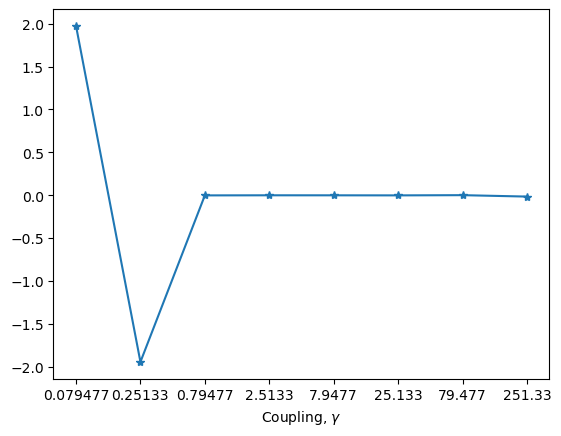

In [17]:
plt.plot(overfit_ratio, "-*")
#plt.yscale("log")
plt.xticks(ticks=range(len(obj_val_lme)), labels = gammas)
#plt.title("Overfitting ratio")
plt.xlabel(r"Coupling, $\gamma$")
#plt.show()
plt.savefig("Overfit_ratio_simLME.pdf")